In [0]:
!pip install -q keras_sequential_ascii

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [0]:
# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

In [0]:
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

In [0]:
# Declare variables
 
batch_size = 32 
# batch_size – the number of training examples in one forward/backward pass.
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 # number of cifar-10 data set classe

epochs = 20
# one epoch – one forward pass and one backward pass of all the training examples
# repeat 20 times

In [0]:
# Load the Cifar-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

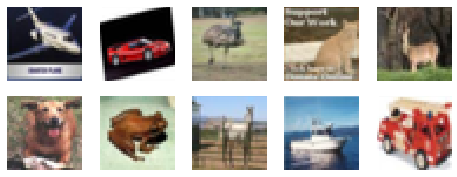

In [9]:
# Print figure with 10 random images from cifar dataset
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    #ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Convert to floating point values in order to perform the division & Preprocessing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [0]:
def base_model():
  
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32,(3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
 
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
 
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
    
  sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)
    
  # train model
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model
  
cnn_n = base_model()
cnn_n.summary()
 
# Fit model 
cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)